<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.304 · Inteligencia Artificial Avanzada / M0.539 · Inteligencia Artificial</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática / MU Ingeniería Computacional y Matemática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## PAC 2: REDUCCIÓN DE DIMENSIONALIDAD Y CLASIFICACIÓN

### Presentación

En esta prueba de evaluación estudiaremos cómo aplicar técnicas de reducción de dimensionalidad y el desarrollo de algoritmos clasificadores.

### Competencias

En este enunciado se trabajan las siguientes competencias generales de
máster:
- Capacidad para proyectar, calcular y diseñar productos, procesos e
instalaciones en todos los ámbitos de la ingeniería informática.
- Capacidad para el modelado matemático, cálculo y simulación en
centros tecnológicos y de ingeniería de empresa, particularmente en
tareas de investigación, desarrollo e innovación en todos los ámbitos
relacionados con la ingeniería informática.
- Capacidad para aplicar los conocimientos adquiridos y solucionar
problemas en entornos nuevos o poco conocidos dentro de contextos
más amplios y multidisciplinares, siendo capaces de integrar estos
conocimientos.
- Poseer habilidades para el aprendizaje continuo, autodirigido y
autónomo.
- Capacidad para modelar, diseñar, definir la arquitectura, implantar,
gestionar, operar, administrar y mantener aplicaciones, redes,
sistemas, servicios y contenidos informáticos.

Las competencias específicas de esta asignatura que se trabajan en esta
prueba son:
- Entender qué es el aprendizaje automático en el contexto de la
inteligencia artificial.
- Distinguir entre los diferentes tipos y métodos de aprendizaje.
- Aplicar las técnicas estudiadas a un caso real.

### Objetivos

En esta PEC estudiaréis el tratamiento de datos reales sobre vinos y la aplicación de técnicas de reducción de dimensionalidad, concretamente, el análisis de componentes principales (_Principal Component Analysis_, PCA). En la segunda parte, trabajaréis con diferentes algoritmos de clasificación, i técnicas i métricas de validación.

### Recursos

Esta PAC requiere los recursos siguientes:

Archivos proporcionados:

  * El archivo .ipynb que estáis leyendo y que deberéis completar con vuestras respuestas para resolver la PEC.

Complementarioss: 
  * Manual de teoría de la asignatura y documentación de las librerías utilizadas (_scikit-learn_, _pandas_, _seaborn_,...).

### Entrega y criterios de evaluación

La PEC se debe entregar el **26 d'abril del 2022**. 

La entrega debe incluir una versión editada de este cuaderno (.ipynb). Se recomienda el uso de Google Colab (https://colab.research.google.com/). El código de las soluciones a los ejercicios se debe implementar y ejecutar en las celdas de código proporcionadas y la respuestas justificadas se deben agregar a las celdas de texto correspondientes.

Todas las respuestas deben estar correctamente razonadas y justificadas. **Las soluciones que no vayan acompañadas de la correspondiente respuesta razonada no serán evaluadas**.

Los ejercicios se valoraran de la siguiente forma:
* Actividad 1: 5 puntos
* Actividad 2: 5 puntos

Cada ejercicio será evaluado teniendo en cuenta tanto la corrección técnica de la solución como la justificación y argumentación del procedimiento y los resultados.

### Descripción de la PEC

En esta PEC se aplicarán técnicas de reducción de dimensionalidad y de clasificación sobre datos de diferentes tipos de vinos obtenidos a partir de su análisis químico:

> Forina, M. "An extendible package for data exploration, classification and correlation (1998)." Institute of Pharmaceutical and Food Analysis and Technologies.

El conjunto de datos incluye muestras de tres tipos de vinos producidos en una misma región de Italia pero procedentes de diferentes cultivos. Los datos se generaron a partir del análisis químico de diferentes muestras. Los atributos incluyen, entre otros, la graduación, el color o el contenido de magnesio. 

Es posible consultar la descripción completa del conjunto de datos en el siguiente enlace:

https://archive.ics.uci.edu/ml/datasets/Wine

El objetivo de esta prueba es estudiar y utilizar métodos de reducción de dimensionalidad i familiarizaros con el desarrollo y validación de algoritmos de clasificación automática.

Las soluciones a los ejercicios estarán basadas principalmente en la librería de código abierto _scikit-learn_ de Python, que incorpora una gran variedad de algoritmos de aprendizaje automático, preprocesado, validación y visualización. Por lo tanto, es muy importante que consultéis la documentación oficial siempre que sea necesario:

https://scikit-learn.org/stable/

## Ejercicio 1

Para empezar, debemos importar los módulos necesarios para cargar los datos. El conjunto de datos original está disponible en _scikit-learn_ y forma parte del módulo _datasets_.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine

Estudiad y ejecutad el código proporcionado en la siguiente celda y familiarizaros con el conjunto de datos.

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

raw_data = load_wine()

df_features = pd.DataFrame(raw_data['data'], 
                           columns=raw_data['feature_names'])
df_labels = pd.DataFrame({'label': raw_data['target']})

df_features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**1.a) (0.5 PUNT)** Explorad el conjunto de datos.

Una vez cargado el conjunt de datos debéis familiarizaros con su contenido. Este apartado no es diferente de algunos apartados que ya habéis trabajado en la PAC1.

Responded a las siguientes cuestiones:
- ¿Cuáles son los atributos incluidos en el conjunto de datos?
- ¿Cuántas muestras incluye el conjunto de datos?
- ¿Cuántas clases, y cuántas muestras de cada una, incluye el conjunto de datos?


In [69]:
# 1.a: añadid y ejecutad vuestro código aquí
print(f"Atributos: {', '.join(raw_data['feature_names'])}")
print(f"Muestras: {len(raw_data['data'])}")
print(f"Las clases son {len(raw_data['target_names'])}: {', '.join(raw_data['target_names'])}")
print(f"Muestras por clase: {np.bincount(raw_data['target'])}")

Atributos: alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline
Muestras: 178
Las clases son 3: class_0, class_1, class_2
Muestras por clase: [59 71 48]


**1.b) (1 PUNT)** Los conjuntos de datos a menudo incluyen una gran cantidad de muestras y atributos. Su análisis se debe llevar a cabo utilizando técnicas estadísticas y de minería de datos y la visualización no siempre es fácilmente accesible. Sin embargo, la visualización parcial en algunos pueda dar algunas pistas. Un ejemplo sería nuestro caso, dado que estamos trabajando con un conjunto de datos de dimensiones reducidas.

Para los primeros 8 atributos, mostrad las gráficas de dispersión (_scatter plot_) de todas las parejas de atributos. Para ello, generad una rejilla de 8x8 gráficas de manera que la gráfica de la posición [ _i_, _j_ ] corresponga a la gráfica de dispersión del atributo _i_ (eje x) y el atributo _j_ (eje x).

Nota: la diagonal de la rejilla corresponderá a un único atributo y, por lo tanto, podéis dejar en blanco las gráficas correspondientes.


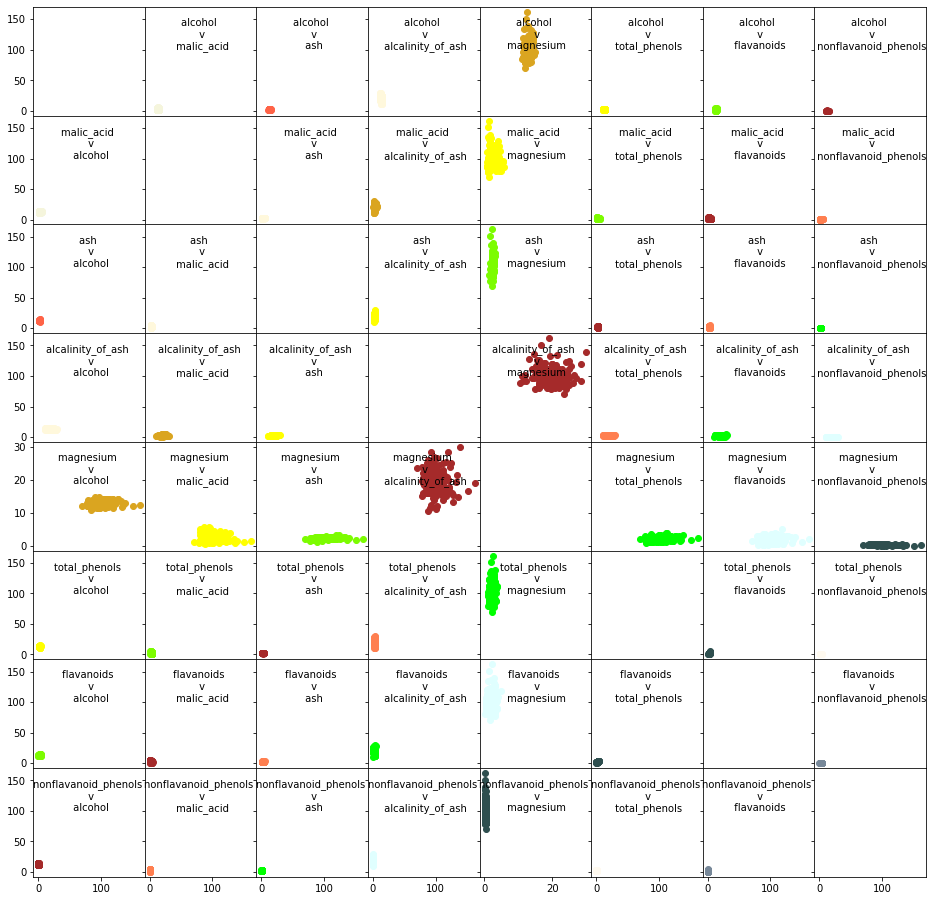

In [5]:
# 1.b: añadid y ejecutad vuestro código aquí
from random import sample

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.pyplot import figure


colors = sample(mcolors.cnames.keys(), 56)

# get first 8 columns
attribute_length = 8
selected_features = df_features.iloc[:,:attribute_length]
columns = selected_features.columns

fig = plt.figure()
fig.set_size_inches(16, 16)
gs = fig.add_gridspec(attribute_length, attribute_length, hspace=0, wspace=0)
for r_index, row in enumerate(gs.subplots(sharex='col', sharey='row')):
    for c_index, axis in enumerate(row):
        if r_index != c_index:
            x, y = columns[r_index], columns[c_index]
            axis.plot(selected_features[x], selected_features[y], 'o', color=colors[r_index + c_index])
            axis.text(.5,.9, f'{x} \n v\n {y}', horizontalalignment='center', transform=axis.transAxes, verticalalignment='top')

## Añadid aquí vuestra respuesta.

**1.c) (1 PUNT)** Representad en una gráfica la media y la desviación típica de todos los atributos. Comentad la gráfica obtenida, indicad los atributos con máxima y mínima dispersión (desviación típica) y proporcionar sus valores.

Nota. Podéis utilizar _matplotlib.errorbar_ para representar la desviación típica.

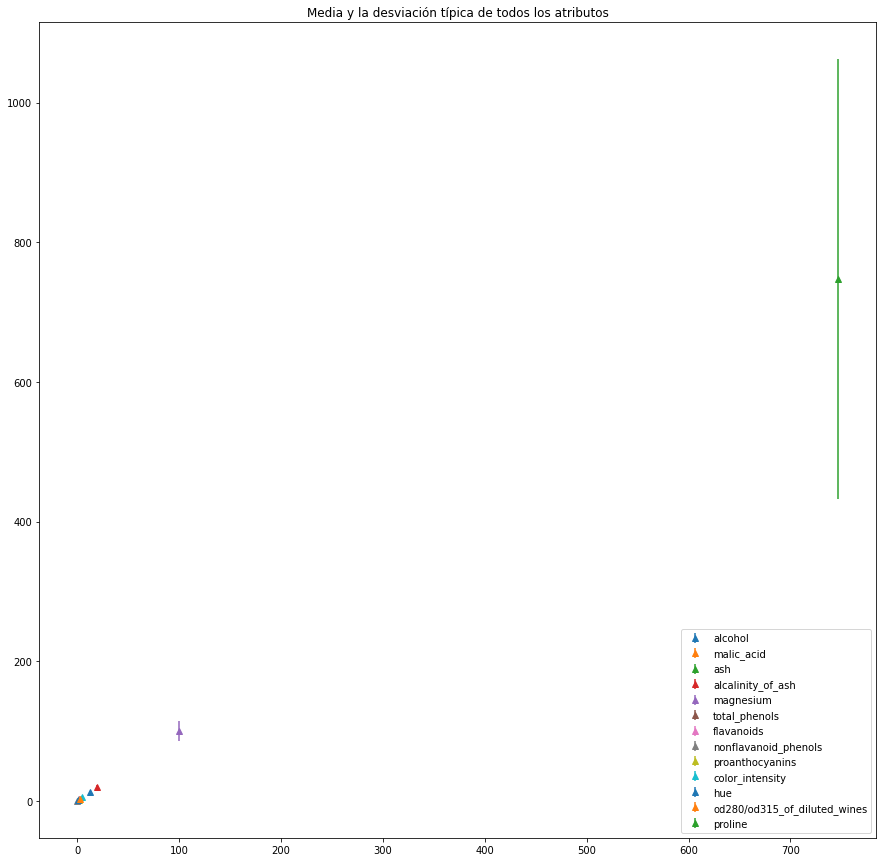

Max std: ('nonflavanoid_phenols', 0.12445334029667937)
Min std: ('proline', 314.9074742768491)


In [74]:
# 1.c: añadid y ejecutad vuestro código aquí
fig = plt.figure()
fig.set_size_inches(15, 15)
plt.title("Media y la desviación típica de todos los atributos")

# plt.errorbar(df_features.alcohol, df_features.alcohol, xerr=0.2, yerr=0.4)
min_std = None
max_std = None
means = []
stds = []

for attr, mean in df_features.mean().items():
    std = df_features[attr].std()
    if not min_std or std < min_std[1]:
        min_std = (attr, std)
    if not max_std or std > max_std[1]:
        max_std = (attr, std)
    means.append(mean)
    stds.append(std)
    plt.errorbar(mean, mean, std, linestyle='None', marker='^', label=attr)

plt.legend(loc='lower right')
plt.show()

print(f"Max std: {min_std}\nMin std: {max_std}")

El atributo con mínima dispersión es 'nonflavanoid_phenols' con un valor de 0.12445334029667937 y el de máxima dispersión es 'proline' con un valor de 314.9074742768491.
Es también proline el atributo con la media más alta y vemos que se encuentra muy alejado de los otros valores que están acotados a valores unas 100 veces menores.

**1.d) (1 PUNT)** Aplicad un análisis PCA a los datos y, de manera similar al Ejercicio 1.c, representad en una gráfica la media y la desviación típica de todos los atributos. Identificad los atributos con máxima y mínima dispersión (desviación típica) y proporcionar sus respectivos valores. Comentad los resultados.

In [14]:
# 1.d: añadid y ejecutad vuestro código aquí
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


x = df_features.loc[:,list(df_features.columns)].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalComponents

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

Añadid aquí vuestra respuesta.

**1.e) (0.5 PUNTS)** De la misma manera que en el ejercicio 1.b, pero en este caso para las 8 primeras componentes principales (espacio PCA), mostrad las gráficas de dispersión (_scatter plot_) de las parejas de componentes en una rejilla de 8x8 gráficas. Comentad el resultado.

In [ ]:
# 1.e: añadid y ejecutad vuestro código aquí

Añadid aquí vuestra respuesta.

**1.f) (1 PUNTS)** Mostrad el gráfico de varianza acumulada explicada por el espacio PCA respecto a la cantidad de componentes. Identificad cuántos componentes PCA son necesarios para representar el 90% de la varianza de los datos originales.

In [ ]:
# 1.f: añadid y ejecutad vuestro código aquí

## EJERCICIO 2

En este ejercicio trabajaremos con diferentes algoritmos de clasificación, técnicas de validación y medidas de evaluación. Para ello utilizaremos una nueva versión del conjunto de datos en el que la cantidad de clases se ha reducido a dos. Estudiad y ejecutad el código proporcionado en la siguiente celda.

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

raw_data = load_wine()

df_features = pd.DataFrame(raw_data['data'], 
                           columns=raw_data['feature_names'])
df_labels = pd.DataFrame({'label': raw_data['target']})
df_labels[df_labels==2] = 0

**2.a) (1 PUNT)** Entrenad un árbol de decisión de profundidad 4, implementado en _scikit-learn_, utilizando el 70% de los datos disponibles (conjunto de entrenamiento) y calculad el tiempo de entrenamiento.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
# 2.a: añadid y ejecutad vuestro código aquí
from time import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(df_features, df_labels, test_size=0.7, random_state=0)
decission_tree = DecisionTreeClassifier(max_depth=4)

start = time()
decission_tree.fit(X_train, Y_train)
end = time()
print(f"Elapsed time was {end - start}")

Elapsed time was 0.005667448043823242


**2.b) (1 PUNT)** Representad el árbol de decisión obtenido. ¿Qué atributo tiene más valor descriptivo?

Nota: Podéis utilizar el método _sklearn.tree.plot_tree_.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

[Text(0.5, 0.8333333333333334, 'od280/od315_of_diluted_wines <= 2.375\ngini = 0.666\nsamples = 53\nvalue = [17, 19, 17]\nclass = 1'),
 Text(0.25, 0.5, 'proanthocyanins <= 1.43\ngini = 0.188\nsamples = 19\nvalue = [0, 2, 17]\nclass = 2'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 17]\nclass = 2'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.75, 0.5, 'proline <= 737.0\ngini = 0.5\nsamples = 34\nvalue = [17, 17, 0]\nclass = 0'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 17\nvalue = [0, 17, 0]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0]\nclass = 0')]

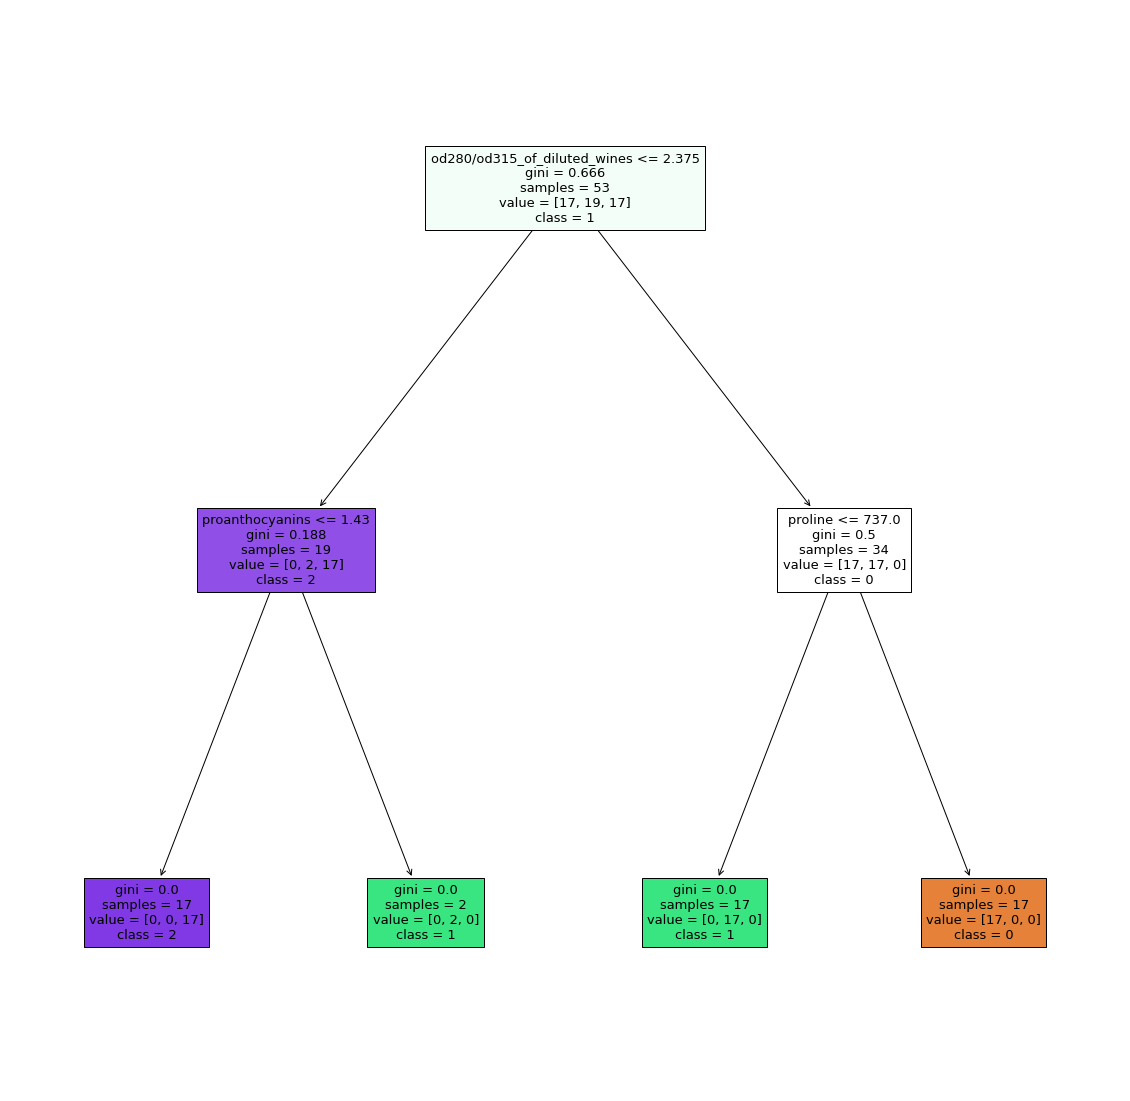

In [108]:
# 2.b: añadid y ejecutad vuestro código aquí
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

figure(figsize=(20, 20))
plot_tree(decission_tree, feature_names=df_features.columns, class_names=['0','1','2'], filled=True)

El atributo con valor más descriptivo ha resultado ser 'od280/od315_of_diluted_wines'

**2.c) (1 PUNT)** Para el conjunto de test restante (30% de los datos), representad la matriz de confusión. Proporcionad una definición con vuestras palabras (no os limitéis a la fórmula) de las métricas precisión, recall y F1-score, y obtened sus valores en el conjunto de test para todas las clases.

/home/pablo/.virtualenvs/IA/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Recall: 0.8461538461538461
F1-score: 0.8380952380952382


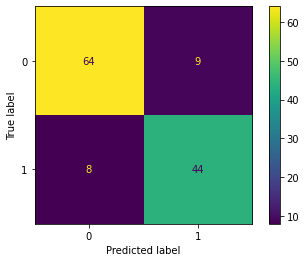

In [46]:
# 2.c: añadid y ejecutad vuestro código aquí
from sklearn.metrics import recall_score, f1_score, plot_confusion_matrix
from matplotlib.pyplot import figure


plot_confusion_matrix(decission_tree, X_test, Y_test)
prediction = decission_tree.predict(X_test)
res = confusion_matrix(Y_test, prediction)
tn, fp, fn, tp = confusion_matrix(Y_test, prediction).ravel()
recall_conf = tp / (tp + fn)
recall = recall_score(Y_test, prediction)
f1 = f1_score(Y_test, prediction)

print(f"Recall: {recall}\nF1-score: {f1}")

**2.d) (1 PUNT)** Entrenad un clasificador AdaBoost con un árbol de decisión de profundidad 2 como estimador y validadlo utilizando validación cruzada con k=5 en todo el conjunto de datos. Obtened precisión, recall, F1-score y comentad los resultados.

Nota: Utilizad _sklearn.model_selection.StratifiedKFold_ en el parámetro _cv_ de _cross_validate_ para crear los subconjuntos (_folds_, _splits_).

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [45]:
# 2.d: añadid y ejecutad vuestro código aquí
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold


model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2))
cross_validation = cross_validate(model, , , cv=StratifiedKFold())

**2.e) (1 PUNT)** Comparad la validación que se ha utilizado en el ejercicio 2.a con la validación utilizada en el ejercicio 2.d. ¿Qué deficiencias puede tener la validación simple? ¿Cuál es la finalidad de utilizar validación cruzada? ¿En qué casos es necesaria? Razonad vuestra respuesta.

Añadid aquí vuestra respuesta.


### Nota: Propiedad intelectual

A menudo es inevitable, al producir una obra multimedia, hacer uso de recursos creados por terceras personas. Es por tanto comprensible hacerlo en el marco de una práctica de los estudios del Grado Multimedia, siempre y cuando esto se documente claramente y no suponga plagio en la práctica.

Por lo tanto, al presentar una práctica que haga uso de recursos ajenos, se presentará junto con ella un documento en el que se detallen todos ellos, especificando el nombre de cada recurso, su autor, el lugar donde se obtuvo y el su estatus legal: si la obra está protegida por copyright o se acoge a alguna otra licencia de uso (Creative Commons, GNU, GPL ...). El estudiante deberá asegurarse de que la licencia que sea no impide específicamente su uso en el marco de la práctica. En caso de no encontrar la información correspondiente deberá asumir que la obra está protegida por copyright.

Deberán, además, adjuntar los archivos originales cuando las obras utilizadas sean digitales, y su código fuente si corresponde.

Otro punto a considerar es que cualquier práctica que haga uso de recursos protegidos por copyright no podrá en ningún caso publicarse en Mosaic, la revista del Grado en Multimedia en la UOC, a no ser que los propietarios de los derechos intelectuales den su autorización explícita.